# Lesson 4: Feature Selection - Case Study

# Import Libraries

**Import the usual libraries **

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Data Set: Cancer Data Set
Features are computed from a digitized image of a Fine-Needle Aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Get the Data

** Use pandas to read data as a dataframe called df.**

In [58]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
# Check the data , there should be no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [60]:
feature_names = np.array(['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'])

#### Convert diagnosis column to 1/0 and store in new column target


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
# # Encode label diagnosis
# # M -> 1
# # B -> 0

In [63]:
# Get All rows, but only last column
target_data=df["diagnosis"]

encoder = LabelEncoder()
target_data = encoder.fit_transform(target_data)

#### Store the encoded column in dataframe and drop the diagnosis column for simpilcity

In [64]:
df.drop(["diagnosis"],axis = 1, inplace = True)

## Principal Component Analysis: PCA

Let's use  PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot

Scale data so that each feature has a single unit variance.

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [67]:
scaled_data = scaler.transform(df)

Now, you can transform this data to its first 2 principal components.

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=2)

In [70]:
pca.fit(scaled_data)

PCA(n_components=2)

In [71]:
x_pca = pca.transform(scaled_data)

In [72]:
scaled_data.shape

(569, 31)

In [73]:
x_pca.shape

(569, 2)

#### Reduced 30 dimensions to just 2! Let's plot these two dimensions out!

** Q1. Plot scatter for 2 components. What inference can you draw from this data? **

Text(0, 0.5, 'Second Principal Component')

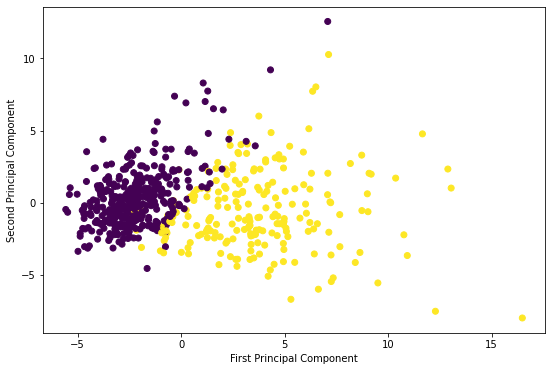

In [74]:
plt.figure(figsize=(9,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target_data,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features. The components themselves are stored as an attribute of the fitted PCA object:

In [75]:
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

# Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as  you can convert n dimensional space to 2 dimensional space, you lose some of the variance (information).

** Q2. What is the variance attributed by 1st and 2nd Components? **

** Q3 Ideally, the sum above should be 100%. What happened to the remaining variance ? **

In [76]:
pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

## Let's try with 3 Principal Components

In [77]:
pca_3 = PCA(n_components=3)
pca_3.fit(scaled_data)
x_pca_3 = pca_3.transform(scaled_data)

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. You can visualize this relationship with a heatmap:

In [78]:
x_pca_3.shape

(569, 3)

** Q4. What is the total variance attributed by three Components? **

In [79]:
pca_3.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436])

### Let's check the accuracy for  2 vs. 3 components

** Q5. What is accuracy for component count 2 vs. 3 ?**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
train_data, test_data, train_output, test_output = train_test_split( df, target_data, test_size=0.3, random_state=101)

In [82]:
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [83]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [84]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_data, train_output)


LogisticRegression()

In [85]:
logisticRegr.score(test_data, test_output)

0.9473684210526315

Score for 3 components

In [86]:
train_data, test_data, train_output, test_output = train_test_split( df, target_data, test_size=0.3, random_state=101)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

train_data = pca_3.transform(train_data)
test_data = pca_3.transform(test_data)
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_data, train_output)
logisticRegr.score(test_data, test_output)

0.9415204678362573

# End of Case Study

========================================================================

In [87]:
#https://github.com/GurungPratima/Cancer_Detection_DimensionalityReduction/blob/master/Mod%208%20-%20Case%20Study%20III.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [88]:
dataset = pd.read_csv('breast-cancer-data.csv')

In [89]:
print (dataset.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encode_data = le.fit_transform(dataset['diagnosis'])

In [92]:
dataset.drop(['diagnosis'], axis=1, inplace=True)

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

In [94]:
from sklearn.decomposition import PCA
#First two components

pca = PCA(n_components=2)
dataset_2D = pca.fit_transform(scaled_data)

In [95]:
dataset_2D_df = pd.DataFrame(dataset_2D)
dataset_2D_df.columns = ['PC1','PC2']
dataset_2D_df.head()

,PC1,PC2
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689


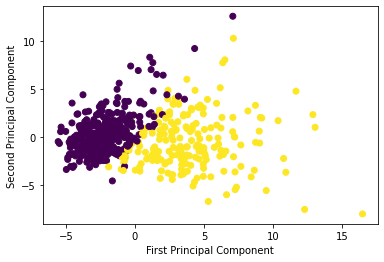

In [96]:
plt.scatter(dataset_2D_df['PC1'],dataset_2D_df['PC2'], c=encode_data, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [97]:
print (pca.explained_variance_ratio_)

[0.42864701 0.18376792]


In [98]:

#Check with 3 components

pca_3 = PCA(n_components=3)
PCA3 = pca_3.fit_transform(scaled_data)
PCA_3 = pd.DataFrame(PCA3)
PCA_3.columns = ['PC1','PC2','PC3']

<AxesSubplot:>

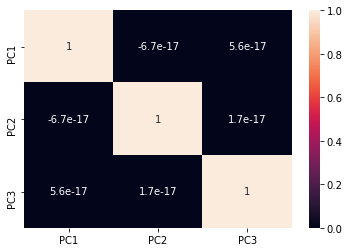

In [99]:
import seaborn as sns

sns.heatmap(PCA_3.corr(), annot=True)

In [100]:
print (pca_3.explained_variance_ratio_)

[0.42864701 0.18376792 0.09146436]


In [107]:
#Check the accuracy for 2 and 3 components
from sklearn.model_selection import train_test_split
train_data, test_data, train_output, test_output = train_test_split(scaled_data,encode_data, test_size=0.3, random_state=101)

In [108]:
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [109]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()  #solver = 'lbfgs'
regressor.fit(train_data,train_output)

LogisticRegression()

In [110]:
regressor.score(test_data,test_output)

0.9473684210526315

In [105]:
# Score for 3 components

train_data, test_data, train_output, test_output = train_test_split(scaled_data,
encode_data, test_size=0.3, random_state=101)

train_data = pca_3.transform(train_data)
test_data = pca_3.transform(test_data)

regressor.fit(train_data,train_output)
regressor.score(test_data,test_output)

0.9415204678362573

In [111]:
#Prediction 
Y_pred=regressor.predict(test_data)
print(Y_pred)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0]


In [114]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_output,Y_pred))

0.9473684210526315


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)